<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/Seasonal%20Arima%20(SARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pmdarima
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt  
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima.utils import ndiffs

In [6]:
df=pd.read_csv('/content/stock_data.csv', index_col='Date', parse_dates=True)

In [7]:
companies = df['Stock'].unique()
stock ={}
for i in companies:
  stock[i] = df[df['Stock'] == i]["Close"]

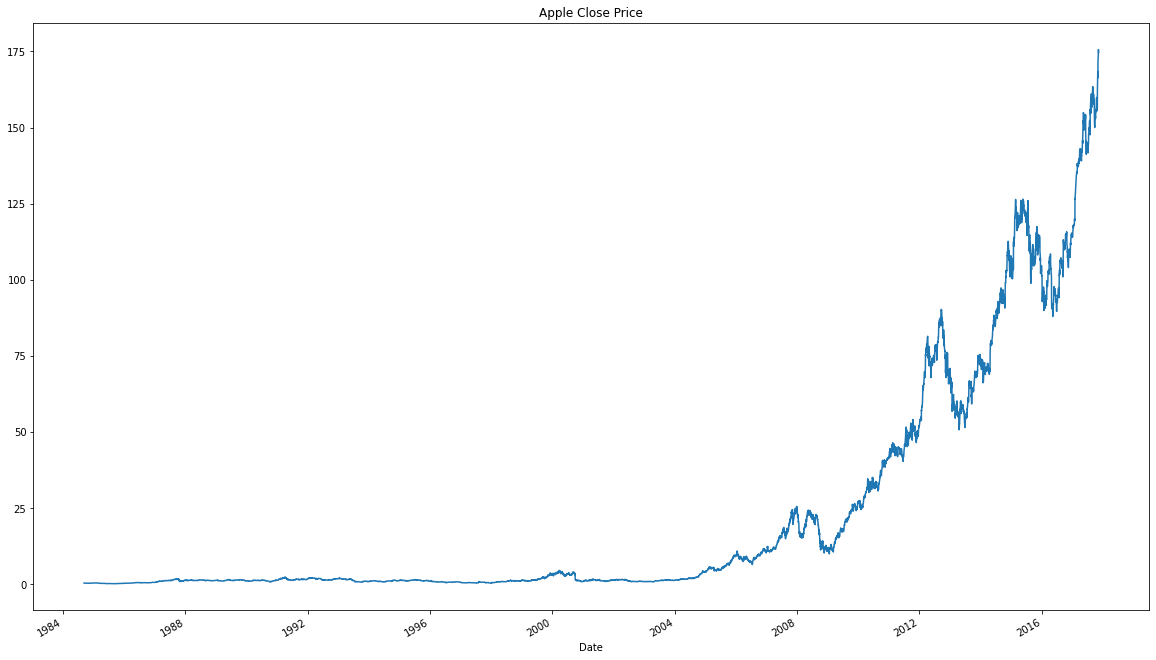

In [8]:
stock['AAPL'].plot(figsize=(20, 12), title="Apple Close Price")

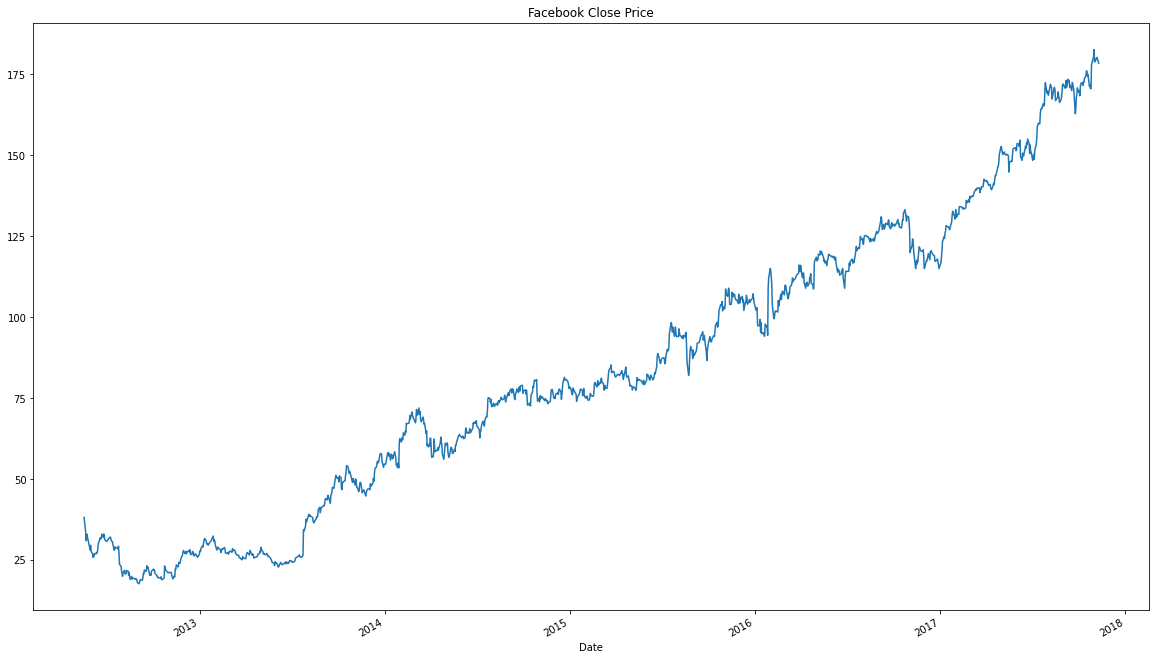

In [9]:
stock['FB'].plot(figsize=(20, 12), title="Facebook Close Price")

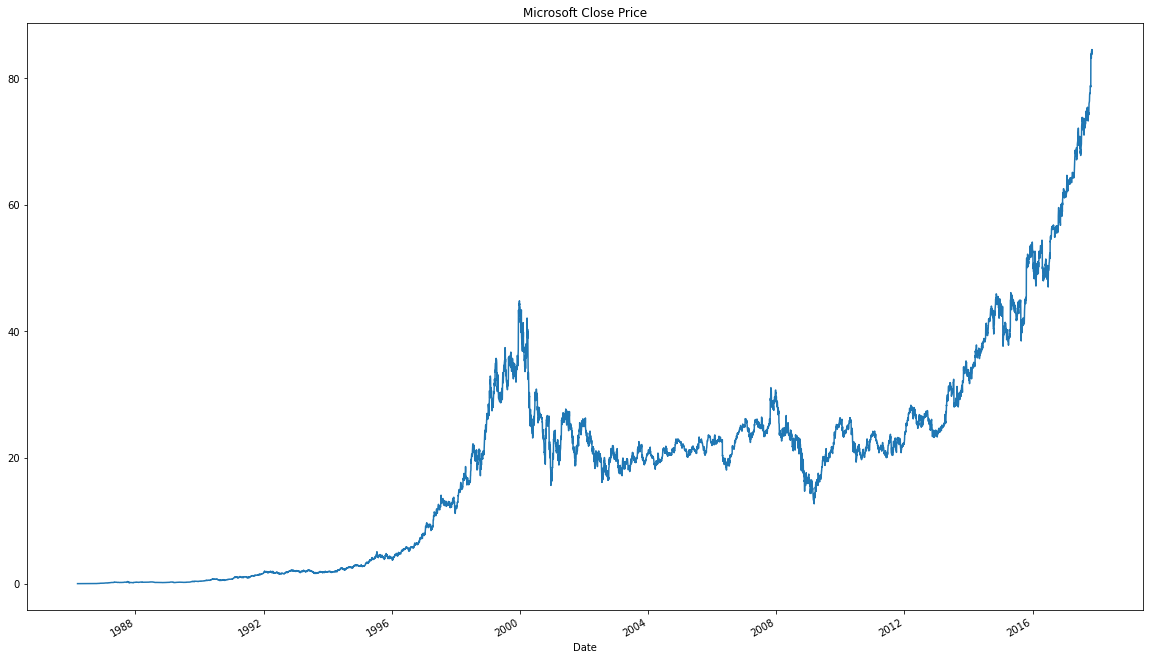

In [10]:
stock['MSFT'].plot(figsize=(20, 12),title="Microsoft Close Price")

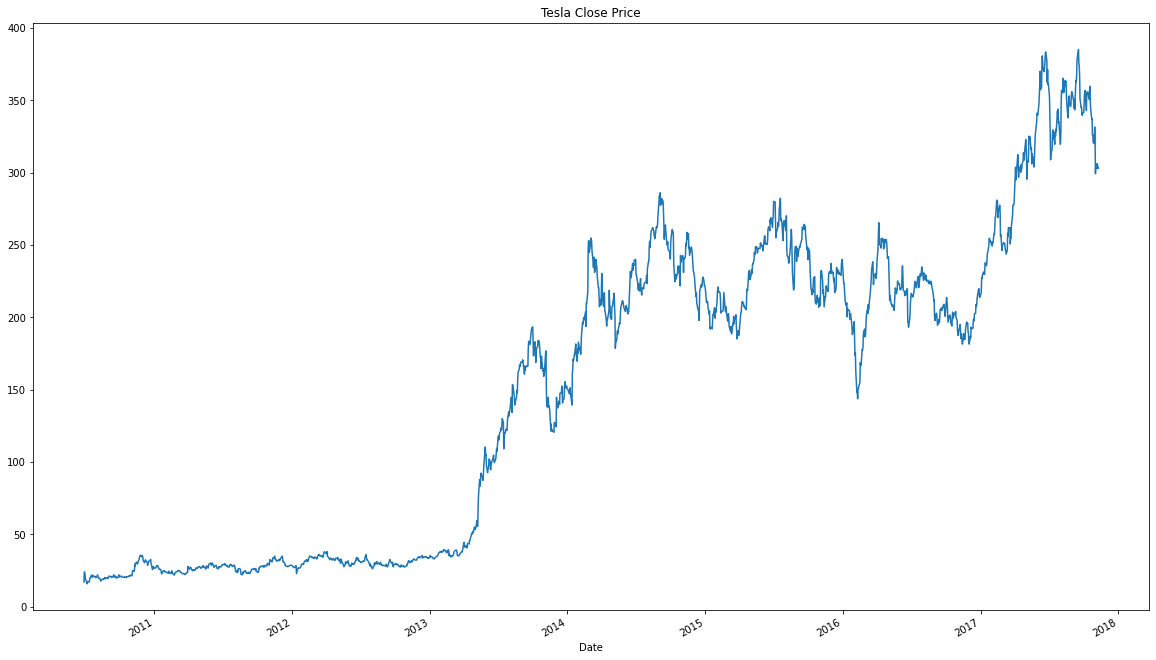

In [11]:
stock['TSLA'].plot(figsize=(20, 12),title="Tesla Close Price")

In [12]:
#Checking For Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [13]:
#define p d q
def Auto_Arima(data):
  stepwise_fit = auto_arima(data, trace=True,suppress_warnings=True,seasonal = True,error_action ='ignore',stepwise = True )
  stepwise_fit.summary()
  return stepwise_fit

In [14]:
#define p d q
def Auto_Arima(data):
  stepwise_fit = auto_arima(data, trace=True,suppress_warnings=True)
  return stepwise_fit

In [15]:
def SplitData(data):#80-20
  train=data.iloc[:-int(len(data)*0.2)]
  test=data.iloc[-int(len(data)*0.2):]
  return train,test

In [32]:
AAPL_train,AAPL_test=SplitData(stock['AAPL'])
TSLA_train,TSLA_test=SplitData(stock['TSLA'])
MSFT_train,MSFT_test=SplitData(stock['MSFT'])
FB_train,FB_test=SplitData(stock['FB'])

In [17]:
def Model(train_data,p,d,q):
  model=ARIMA(train_data,order=(p,d,q))
  model=model.fit(disp=-1)
  return model

In [36]:
#get parameters for Sarimax
def getParams(data):
  stepwise_fit = auto_arima(data, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)           
  
  # To print the summary
  stepwise_fit.summary()

In [ ]:
getParams(stock['MSFT'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=inf, Time=46.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=14546.565, Time=0.35 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=12417.858, Time=2.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=14.89 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=14543.039, Time=0.39 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11356.114, Time=5.86 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=45.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=17.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=11357.658, Time=4.99 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=11357.693, Time=10.56 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=11357.725, Time=15.75 sec


In [25]:
#demo getParams function
stepwise_fit = auto_arima(stock['TSLA'], m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=20.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=15658.938, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=11716.904, Time=3.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=13975.070, Time=6.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=15680.524, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=12223.511, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=11551.786, Time=11.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.33 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.92 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=15655.701, Time=8.72 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=11548.357, Time=14.45 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=11712.654, Time=5.18 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=21.48 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.59 sec
 ARIMA(3,0,0)(2,1,0)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1858
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood               -5762.420
Date:                             Thu, 03 Jun 2021   AIC                          11538.839
Time:                                     15:07:04   BIC                          11577.484
Sample:                                          0   HQIC                         11553.086
                                            - 1858                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0160      0.010      1.644      0.100      -0.003       0.035
ar.L1          1.9206      0.022     88.770      0.000       1.878       1.963
ar.L2         -0.9248      0.021    -44.972      0.000      -0.965      -0.885
ma.L1         -0.9304      0.026    -35.279      0.000      -0.982      -0.879
ar.S.L12      -0.6579      0.016    -40.141      0.000      -0.690      -0.626
ar.S.L24      -0.2979      0.019    -15.914      0.000      -0.335      -0.261
sigma2        30.0062      0.565     53.077      0.000      28.898      31.114
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):              1436.36
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):              36.23   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
def Get_Model(data,order,seasonal_order):
  model=SARIMAX(data,order=order,seasonal_order=seasonal_order)
  result=model.fit()
  return result

In [28]:
TSLA_Model=Get_Model(stock['TSLA'],(2,0,1),(2,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [33]:
def Plot_Predictions(model,data,train,test):

  start = len(train)
  end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
  predictions = model.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
  predictions.plot(legend = True,figsize=(20,12))
  test.plot(legend = True)


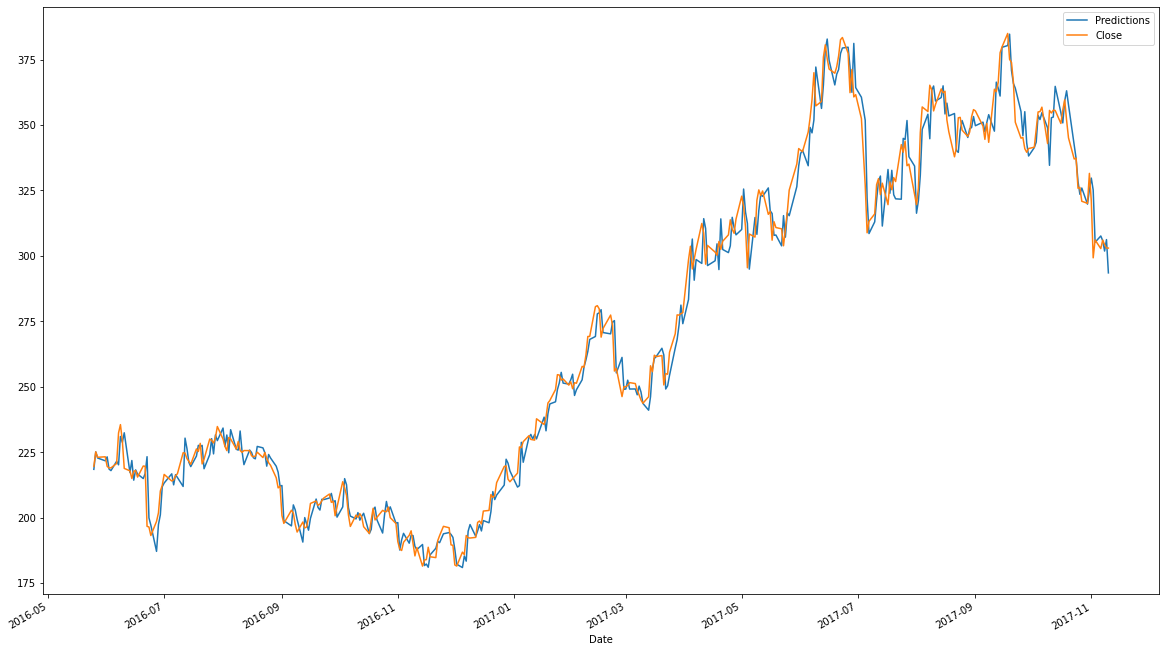

In [34]:
Plot_Predictions(TSLA_Model,stock['TSLA'],TSLA_train,TSLA_test)

In [ ]:
#RMSE
def RMSE(model,train_data,test_data):
  start=len(train_data)
  end=len(train_data)+len(test_data)-1
  pred=model.predict(start=start,end=end,typ='levels')
  test_data.mean()
  rmse=sqrt(mean_squared_error(pred,test_data))
  return rmse